## Brian Masibo
### 20/00967

In [1]:
#Install and import necessary Libraries
!pip install factor_analyzer
!pip install Factor_Analyzer
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [6]:
#Load data
# Data on the effects of gender and other pre-existing conditions on covid-19 results, from Kaggle.com
attributes=["sex","pneumonia","asthma","hypertension","cardiovascular"]
data=pd.read_csv('C:\Pydatafiles/Italy.csv', names =attributes)
data.head()

,sex,pneumonia,asthma,hypertension,cardiovascular
0,2,2,2,1,2
1,2,2,2,2,2
2,2,2,2,2,2
3,1,1,2,2,2
4,2,2,2,2,2


In [7]:
# Determine Factorabiity
#i. Barlett_sphericity Test
from scipy.stats import chisquare
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(data)
chi_square_value, p_value

(1033918.5155763665, 0.0)

#### Since the Barlett's test of spericity has a p_value of zero, which is less than 0.05, it indicates that their exists sufficient correlation among the variable, therefore we reject the null hypothesis and proceed with Factor Analysis

In [8]:
#ii. Perform KMO Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model=calculate_kmo(data)
print("\nKMO Model\n",kmo_model)


KMO Model
 0.7747263624075615


#### The overall KMO for the data is 0.775 which is middling, thus acceptable

In [9]:
factor=FactorAnalysis().fit(data)
Factors=pd.DataFrame(factor.components_, columns=attributes)
print(Factors)

        sex  pneumonia    asthma  hypertension  cardiovascular
0  0.004918  -0.005582  4.932668      4.975385        5.019342
1  0.000450  -0.013664  0.670924     -1.345026        0.673879
2  0.002633  -0.000029  0.878490      0.003788       -0.867086
3 -0.079955   0.098187  0.001604     -0.001626        0.000638
4  0.000000   0.000000  0.000000     -0.000000        0.000000


#### 4 factors have a significant correlation to the original observables, therefore we use 4 factors as the new variables

In [11]:
#Extract Factors
factor=FactorAnalysis().fit(data)
Factors=pd.DataFrame(factor.components_,columns=attributes)
print(Factors)

        sex  pneumonia    asthma  hypertension  cardiovascular
0  0.004918  -0.005582  4.932668      4.975385        5.019342
1  0.000450  -0.013664  0.670924     -1.345026        0.673879
2  0.002633  -0.000029  0.878490      0.003788       -0.867086
3 -0.079955   0.098187  0.001604     -0.001626        0.000638
4  0.000000   0.000000  0.000000     -0.000000        0.000000


In [13]:
#Choose Factors
#i. Use Kaiser Criterion to Get Eigen Values
fa=FactorAnalyzer()
fa.analyze(data, 5, rotation=None)

#Check Eigenvalues
ev, v =fa.get_eigenvalues()
print(ev)

   Original_Eigenvalues
0              2.771022
1              1.051009
2              0.948764
3              0.135658
4              0.093548


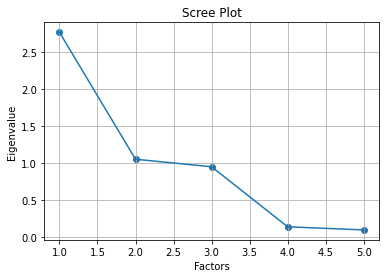

In [14]:
#Choose Factors
#ii. Create scree plot using matplotlib
#Check the shape of the data
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#### This scree plot shows  that only 2  eigenvalues are greater than one. It means we need to choose only 2 factors 


In [18]:
#Rotate Factors
#i. Generate Rotated Factor Matrix
fa = FactorAnalyzer()
fa.analyze(data, 2, rotation="varimax")
loading_matrix = fa.loadings
print(loading_matrix)

                 Factor1   Factor2
sex             0.007923 -0.053329
pneumonia       0.028128  0.965322
asthma          0.950325 -0.039698
hypertension    0.918362 -0.029790
cardiovascular  0.952159 -0.039677


##### i.  Factor 1 has high factor loadings for sex, asthma, hypertension and cardiovascular
##### ii. Factor 2 has high factor loadings for pneumonia

In [ ]:
# Get variance of each factors
fa.get_factor_variance()